# ADS 509 Module 3: Group Comparison 

The task of comparing two groups of text is fundamental to textual analysis. There are innumerable applications: survey respondents from different segments of customers, speeches by different political parties, words used in Tweets by different constituencies, etc. In this assignment you will build code to effect comparisons between groups of text data, using the ideas learned in reading and lecture.

This assignment asks you to analyze the lyrics for the two artists you selected in Module 1 and the Twitter descriptions pulled for Robyn and Cher. If the results from that pull were not to your liking, you are welcome to use the zipped data from the “Assignment Materials” section. Specifically, you are asked to do the following: 

* Read in the data, normalize the text, and tokenize it. When you tokenize your Twitter descriptions, keep hashtags and emojis in your token set. 
* Calculate descriptive statistics on the two sets of lyrics and compare the results. 
* For each of the four corpora, find the words that are unique to that corpus. 
* Build word clouds for all four corpora. 

Each one of the analyses has a section dedicated to it below. Before beginning the analysis there is a section for you to read in the data and do your cleaning (tokenization and normalization). 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [3]:
import os
import re
import emoji
import pandas as pd

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud 

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer


In [53]:
# Use this space for any additional import statements you need
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords', download_dir='/Users/justinfarnan_hakkoda/ads_text_mining/M3/ads-tm-group-comparision/nltk_data')
from nltk.corpus import stopwords
from string import punctuation
sw = stopwords.words("english")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/justinfarnan_hakkoda/ads_text_mining/M3/ads-tm-
[nltk_data]     group-comparision/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/justinfarnan_hakkoda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
# Place any addtional functions or constants you need here. 

# Some punctuation variations
punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

# Stopwords
sw = stopwords.words("english")

# Two useful regex
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")

# It's handy to have a full set of emojis
all_language_emojis = set()

for country in emoji.EMOJI_DATA : 
    for em in emoji.EMOJI_DATA[country] : 
        all_language_emojis.add(em)

# and now our functions
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity, and num_tokens most common
        tokens. Return a list of 
    """
     # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = len(set(tokens)) / len(tokens)
    num_characters = (sum(len(token) for token in tokens))
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])

    
def contains_emoji(s):
    
    s = str(s)
    emojis = [ch for ch in s if emoji.is_emoji(ch)]

    return(len(emojis) > 0)


def remove_stop(tokens):
    stopwords_list = set(stopwords.words('english'))
    tokens_lower = [token.lower() for token in tokens]
    tokens_no_stopwords = [token for token in tokens_lower if token not in stopwords_list]
    # modify this function to remove stopwords
    return(tokens_no_stopwords)
 
def remove_punctuation(text, punct_set=tw_punct) : 
    return("".join([ch for ch in text if ch not in punct_set]))

def tokenize(text) : 
    """ Splitting on whitespace rather than the book's tokenize function. That 
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. """
    tokenized_words = word_tokenize(text)
    # modify this function to return tokens
    return(tokenized_words)

def prepare(text, pipeline) : 
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return(tokens)


## Data Ingestion

Use this section to ingest your data into the data structures you plan to use. Typically this will be a dictionary or a pandas DataFrame.

In [6]:
# Feel fre to use the below cells as an example or read in the data in a way you prefer

data_location = "/Users/justinfarnan_hakkoda/ads_text_mining/M3/M1_Results" # change to your location if it is not in the same directory as your notebook
twitter_folder = "/twitter/"
lyrics_folder = "/lyrics/"

artist_files = {'cher':'cher_followers_data.txt',
                'robyn':'robynkonichiwa_followers_data.txt'}


In [7]:
twitter_data = pd.read_csv(data_location + twitter_folder + artist_files['cher'],
                           sep="\t",
                           quoting=3)

twitter_data['artist'] = "cher"

In [9]:
twitter_data_2 = pd.read_csv(data_location + twitter_folder + artist_files['robyn'],
                             sep="\t",
                             quoting=3)
twitter_data_2['artist'] = "robyn"

twitter_data = pd.concat([
    twitter_data,twitter_data_2])
    
del(twitter_data_2)

In [11]:
twitter_data.head()

,screen_name,name,id,location,followers_count,friends_count,description,artist
0,hsmcnp,Country Girl,35152213,NaN,1302,1014,NaN,cher
1,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,cher
2,anju79990584,anju,1496463006451974150,NaN,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,cher
3,gallionjenna,J,3366479914,NaN,752,556,csu,cher
4,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,Writer @Washinformer @SpelmanCollege alumna #D...,cher


In [12]:
# read in the lyrics here
lyrics_data = pd.DataFrame(columns = ['artist', 'song', 'lyris'])

for artist in os.listdir(f'{data_location}/lyrics'):
    artist_folder = os.path.join(data_location, 'lyrics', artist)
    for song in os.listdir(artist_folder):
        song_file = os.path.join(artist_folder, song)
        with open(song_file, 'r') as file:
            lyrics = file.read()
            new_row = pd.DataFrame({'artist': [artist], 'song': [song], 'lyrics': [lyrics]})
            lyrics_data = pd.concat([lyrics_data, new_row], ignore_index=True)

In [13]:
lyrics_data

,artist,song,lyris,lyrics
0,robyn,robyn_includemeout.txt,NaN,"""Include Me Out""\n\n\n\nIt is really very simp..."
1,robyn,robyn_electric.txt,NaN,"""Electric""\n\n\n\nElectric...\n\nIt's electric..."
2,robyn,robyn_beach2k20.txt,NaN,"""Beach 2K20""\n\n\n\n(So you wanna go out?\nHow..."
3,robyn,robyn_lovekills.txt,NaN,"""Love Kills""\n\n\n\nIf you're looking for love..."
4,robyn,robyn_timemachine.txt,NaN,"""Time Machine""\n\n\n\nHey, what did I do?\nCan..."
...,...,...,...,...
415,cher,cher_takeitfromtheboys.txt,NaN,"""Take It From The Boys""\n\n\n\nSo scared I nev..."
416,cher,cher_dreambaby.txt,NaN,"""Dream Baby""\n\n\n\nI found the boy for me\nHe..."
417,cher,cher_pleasedonttellme.txt,NaN,"""Please Don't Tell Me""\n\n\n\nYa shook the ove..."
418,cher,cher_ihopeyoufindit.txt,NaN,"""I Hope You Find It""\n\n\n\nThese clouds aren'..."


## Tokenization and Normalization

In this next section, tokenize and normalize your data. We recommend the following cleaning. 

**Lyrics** 

* Remove song titles
* Casefold to lowercase
* Remove stopwords (optional)
* Remove punctuation
* Split on whitespace

Removal of stopwords is up to you. Your descriptive statistic comparison will be different if you include stopwords, though TF-IDF should still find interesting features for you. Note that we remove stopwords before removing punctuation because the stopword set includes punctuation.

**Twitter Descriptions** 

* Casefold to lowercase
* Remove stopwords
* Remove punctuation other than emojis or hashtags
* Split on whitespace

Removing stopwords seems sensible for the Twitter description data. Remember to leave in emojis and hashtags, since you analyze those. 

In [14]:
# apply the `pipeline` techniques from BTAP Ch 1 or 5

my_pipeline = [str.lower, remove_punctuation, tokenize, remove_stop]

lyrics_data["tokens"] = lyrics_data["lyrics"].apply(prepare,pipeline=my_pipeline)
lyrics_data["num_tokens"] = lyrics_data["tokens"].map(len) 

twitter_data["tokens"] = twitter_data["description"].apply(prepare,pipeline=my_pipeline)
twitter_data["num_tokens"] = twitter_data["tokens"].map(len) 


In [15]:
twitter_data['has_emoji'] = twitter_data["description"].apply(contains_emoji)

Let's take a quick look at some descriptions with emojis.

In [16]:
twitter_data[twitter_data.has_emoji].sample(10)[["artist","description","tokens"]]

,artist,description,tokens
57153,cher,☮♐ im just a bunch of Hozier's lyrics glued to...,"[☮♐, im, bunch, hoziers, lyrics, glued, togeth..."
3774456,cher,🐼,[🐼]
363551,cher,The logical idiot of the 21 century. 🤷🏻 #IPL20...,"[logical, idiot, 21, century, 🤷🏻, #, ipl2021, ..."
649868,cher,married 24 yrs to that girl💐 I met at 16💞💛💚 lo...,"[married, 24, yrs, girl💐, met, 16💞💛💚, love, an..."
115907,cher,🤠,[🤠]
1368292,cher,I have so many dreams and I want to follow the...,"[many, dreams, want, follow, follow, believe, ..."
37818,cher,MMRMORENOMICHSXEMi£°•÷NWA NWA. OKDREDRe-eazye....,"[mmrmorenomichsxemi£°•÷nwa, nwa, okdredreeazye..."
278453,cher,Just your average gamer DMs always open He/Him...,"[average, gamer, dms, always, open, hehimtheyt..."
861490,cher,"mom, partner, grandma (beloved children and Ge...","[mom, partner, grandma, beloved, children, ger..."
460196,cher,free-spirited liberal☮,"[freespirited, liberal☮]"


With the data processed, we can now start work on the assignment questions. 

Q: What is one area of improvement to your tokenization that you could theoretically carry out? (No need to actually do it; let's not make perfect the enemy of good enough.)

A: I see a couple things that could be worked on, one is that there are still a few special characters that have no meaining such as, £°•÷, this provides no value or context to what is being said. Also we could try and break down words more for example, try and obtain the root for each word so removing any "s" or "ed" at the end of words so that they are not duplicated in our analysis unless it is actually used twice.

## Calculate descriptive statistics on the two sets of lyrics and compare the results. 


In [17]:
lyrics_data

,artist,song,lyris,lyrics,tokens,num_tokens
0,robyn,robyn_includemeout.txt,NaN,"""Include Me Out""\n\n\n\nIt is really very simp...","[include, really, simple, single, pulse, repea...",235
1,robyn,robyn_electric.txt,NaN,"""Electric""\n\n\n\nElectric...\n\nIt's electric...","[electric, electric, electric, natural, high, ...",153
2,robyn,robyn_beach2k20.txt,NaN,"""Beach 2K20""\n\n\n\n(So you wanna go out?\nHow...","[beach, 2k20, wan, na, go, gon, na, get, ok, c...",184
3,robyn,robyn_lovekills.txt,NaN,"""Love Kills""\n\n\n\nIf you're looking for love...","[love, kills, youre, looking, love, get, heart...",246
4,robyn,robyn_timemachine.txt,NaN,"""Time Machine""\n\n\n\nHey, what did I do?\nCan...","[time, machine, hey, cant, believe, fit, threw...",129
...,...,...,...,...,...,...
415,cher,cher_takeitfromtheboys.txt,NaN,"""Take It From The Boys""\n\n\n\nSo scared I nev...","[take, boys, scared, never, hard, keep, good, ...",212
416,cher,cher_dreambaby.txt,NaN,"""Dream Baby""\n\n\n\nI found the boy for me\nHe...","[dream, baby, found, boy, hes, dream, baby, do...",93
417,cher,cher_pleasedonttellme.txt,NaN,"""Please Don't Tell Me""\n\n\n\nYa shook the ove...","[please, dont, tell, ya, shook, override, whyd...",46
418,cher,cher_ihopeyoufindit.txt,NaN,"""I Hope You Find It""\n\n\n\nThese clouds aren'...","[hope, find, clouds, arent, going, nowhere, da...",135


In [19]:
# your code here
cher_lyrics = lyrics_data[lyrics_data['artist'] == 'cher']
for text in cher_lyrics['tokens']:
    try:
        tokens = text  # Add this line to get the tokens from the text
        stats_verbose_true = descriptive_stats(text, verbose=True)
        stats_verbose_false = descriptive_stats(text, verbose=False)
        expected_num_tokens = len(tokens)
        expected_num_unique_tokens = len(set(tokens))
        expected_lexical_diversity = len(set(tokens)) / len(tokens)
        expected_num_characters = sum(len(token) for token in tokens)
        
        assert(stats_verbose_true[0] == expected_num_tokens)
        assert(stats_verbose_false[1] == expected_num_unique_tokens)
        assert(abs(stats_verbose_false[2] - expected_lexical_diversity) < 0.02)
        assert(stats_verbose_false[3] == expected_num_characters)
    except AssertionError:
        print(f"Assertion failed for text: {text}")
    except Exception as e:
        print(f"Error processing text: {text}. Error: {e}")

There are 80 tokens in the data.
There are 48 unique tokens in the data.
There are 342 characters in the data.
The lexical diversity is 0.600 in the data.
There are 147 tokens in the data.
There are 79 unique tokens in the data.
There are 637 characters in the data.
The lexical diversity is 0.537 in the data.
There are 160 tokens in the data.
There are 106 unique tokens in the data.
There are 774 characters in the data.
The lexical diversity is 0.662 in the data.
There are 82 tokens in the data.
There are 54 unique tokens in the data.
There are 386 characters in the data.
The lexical diversity is 0.659 in the data.
There are 89 tokens in the data.
There are 59 unique tokens in the data.
There are 408 characters in the data.
The lexical diversity is 0.663 in the data.
There are 78 tokens in the data.
There are 45 unique tokens in the data.
There are 389 characters in the data.
The lexical diversity is 0.577 in the data.
There are 84 tokens in the data.
There are 47 unique tokens in the 

In [20]:
robyn_lyrics = lyrics_data[lyrics_data['artist'] == 'robyn']
for text in robyn_lyrics['tokens']:
    try:
        tokens = text  # Add this line to get the tokens from the text
        stats_verbose_true = descriptive_stats(text, verbose=True)
        stats_verbose_false = descriptive_stats(text, verbose=False)
        expected_num_tokens = len(tokens)
        expected_num_unique_tokens = len(set(tokens))
        expected_lexical_diversity = len(set(tokens)) / len(tokens)
        expected_num_characters = sum(len(token) for token in tokens)
        
        assert(stats_verbose_true[0] == expected_num_tokens)
        assert(stats_verbose_false[1] == expected_num_unique_tokens)
        assert(abs(stats_verbose_false[2] - expected_lexical_diversity) < 0.02)
        assert(stats_verbose_false[3] == expected_num_characters)
    except AssertionError:
        print(f"Assertion failed for text: {text}")
    except Exception as e:
        print(f"Error processing text: {text}. Error: {e}")

There are 235 tokens in the data.
There are 89 unique tokens in the data.
There are 1186 characters in the data.
The lexical diversity is 0.379 in the data.
There are 153 tokens in the data.
There are 63 unique tokens in the data.
There are 818 characters in the data.
The lexical diversity is 0.412 in the data.
There are 184 tokens in the data.
There are 35 unique tokens in the data.
There are 713 characters in the data.
The lexical diversity is 0.190 in the data.
There are 246 tokens in the data.
There are 42 unique tokens in the data.
There are 1162 characters in the data.
The lexical diversity is 0.171 in the data.
There are 129 tokens in the data.
There are 53 unique tokens in the data.
There are 624 characters in the data.
The lexical diversity is 0.411 in the data.
There are 247 tokens in the data.
There are 42 unique tokens in the data.
There are 1167 characters in the data.
The lexical diversity is 0.170 in the data.
There are 113 tokens in the data.
There are 70 unique tokens 

Q: what observations do you make about these data? 

A: I would say that at first glance I can tell that there is a different in the lexical diversity between teh cher and robyn lyrics. It seems that cher has a higher score for the first part of her songs when compared to robyn which may indicate that cher has less repetitive words and possibly less catchy songs and more story telling songs.


## Find tokens uniquely related to a corpus

Typically we would use TF-IDF to find unique tokens in documents. Unfortunately, we either have too few documents (if we view each data source as a single document) or too many (if we view each description as a separate document). In the latter case, our problem will be that descriptions tend to be short, so our matrix would be too sparse to support analysis. 

To avoid these problems, we will create a custom statistic to identify words that are uniquely related to each corpus. The idea is to find words that occur often in one corpus and infrequently in the other(s). Since corpora can be of different lengths, we will focus on the _concentration_ of tokens within a corpus. "Concentration" is simply the count of the token divided by the total corpus length. For instance, if a corpus had length 100,000 and a word appeared 1,000 times, then the concentration would be $\frac{1000}{100000} = 0.01$. If the same token had a concentration of $0.005$ in another corpus, then the concentration ratio would be $\frac{0.01}{0.005} = 2$. Very rare words can easily create infinite ratios, so you will also add a cutoff to your code so that a token must appear at least $n$ times for you to return it. 

An example of these calculations can be found in [this spreadsheet](https://docs.google.com/spreadsheets/d/1P87fkyslJhqXFnfYezNYrDrXp_GS8gwSATsZymv-9ms). Please don't hesitate to ask questions if this is confusing. 

In this section find 10 tokens for each of your four corpora that meet the following criteria: 

1. The token appears at least `n` times in all corpora
1. The tokens are in the top 10 for the highest ratio of appearances in a given corpora vs appearances in other corpora.

You will choose a cutoff for yourself based on the side of the corpus you're working with. If you're working with the Robyn-Cher corpora provided, `n=5` seems to perform reasonably well.

In [24]:
def find_unique_tokens(corpus1, corpus2, corpus3, corpus4, n=5):
    # Calculate concentrations for each corpus
    concentrations = {}
    corpora = [corpus1, corpus2, corpus3, corpus4]
    for i, corpus in enumerate(corpora):
        corpus = [token for document in corpus for token in document]  # Flatten the list of lists
        concentrations[i] = {}
        total_length = len(corpus)
        for token in set(corpus):
            count = corpus.count(token)
            if count >= n:
                concentrations[i][token] = count / total_length
    
    # Calculate concentration ratios
    ratios = {}
    for i, corpus in enumerate(corpora):
        ratios[i] = {}
        for token, concentration in concentrations[i].items():
            other_concentrations = [concentrations[j].get(token, 0) for j in range(4) if j != i]
            ratio = concentration / max(other_concentrations) if other_concentrations else 0
            ratios[i][token] = ratio
    
    # Find top 10 tokens for each corpus
    top_tokens = {}
    for i, corpus in enumerate(corpora):
        top_tokens[i] = sorted(ratios[i], key=ratios[i].get, reverse=True)[:10]
    
    return top_tokens

In [26]:
import pandas as pd

def find_unique_tokens_2(corpus1, corpus2, corpus3, corpus4, n=5):
    # Create a DataFrame with the tokenized corpora
    corpora = pd.DataFrame({'corpus1': corpus1, 'corpus2': corpus2, 'corpus3': corpus3, 'corpus4': corpus4})
    
    # Calculate the concentrations for each corpus
    concentrations = corpora.apply(lambda x: x.value_counts() / len(x), axis=1)
    
    # Calculate the ratios for each corpus
    ratios = concentrations.apply(lambda x: x / concentrations.max(axis=1), axis=1)
    
    # Find the top 10 tokens for each corpus
    top_tokens = ratios.apply(lambda x: x.nlargest(10).index, axis=1)
    
    return top_tokens

In [37]:
# corpus1 = lyrics_data[lyrics_data['artist'] == 'cher']['tokens']
# corpus2 = lyrics_data[lyrics_data['artist'] == 'robyn']['tokens']
# corpus3 = twitter_data[twitter_data['artist'] == 'robyn']['tokens']
# corpus4 =  twitter_data[twitter_data['artist'] == 'cher']['tokens']

corpus1 = [token for document in lyrics_data[lyrics_data['artist'] == 'cher']['tokens'] for token in document]
corpus2 = [token for document in lyrics_data[lyrics_data['artist'] == 'robyn']['tokens'] for token in document]
corpus3 = [token for document in twitter_data[twitter_data['artist'] == 'robyn']['tokens'] for token in document]
corpus4 = [token for document in twitter_data[twitter_data['artist'] == 'cher']['tokens'] for token in document]

token_freqs = {}
for corpus in [corpus1, corpus2, corpus3, corpus4]:
    for token in corpus:
        if token not in token_freqs:
            token_freqs[token] = 0
        token_freqs[token] += 1

concentrations = pd.DataFrame(token_freqs, index=[0]).T
max_freq = max(token_freqs.values())
ratios = {token: freq / max_freq for token, freq in token_freqs.items()}
#ratios = concentrations.apply(lambda x: x / concentrations.max(axis=0), axis=0)


# result = find_unique_tokens_2(corpus1, corpus2, corpus3, corpus4, n=5)

In [49]:
token_freqs

{'come': 10859,
 'stay': 9653,
 'ill': 11347,
 'send': 2037,
 'away': 4561,
 'false': 199,
 'pride': 1721,
 'forsake': 16,
 'life': 131549,
 'yes': 4574,
 'true': 9027,
 'youll': 3530,
 'lovers': 892,
 'past': 3467,
 'leave': 3276,
 'behind': 2003,
 'theyll': 174,
 'never': 24702,
 'another': 5608,
 'mind': 9470,
 'feel': 7360,
 'free': 14862,
 'promise': 1139,
 'made': 8416,
 'faithfully': 34,
 'keep': 11227,
 'still': 12445,
 'decide': 596,
 'try': 6928,
 'see': 15001,
 'need': 12984,
 'live': 49999,
 'others': 8675,
 'ever': 10752,
 'known': 2571,
 'know': 29582,
 'think': 11657,
 'im': 149060,
 'hardly': 216,
 'grown': 2361,
 'oh': 6357,
 'thank': 3483,
 'god': 24589,
 'last': 5027,
 'finally': 1489,
 'youre': 7472,
 'gon': 4051,
 'na': 13296,
 'pirate': 413,
 'hell': 3728,
 'sail': 203,
 'summer': 1999,
 'wind': 849,
 'blows': 106,
 'day': 26223,
 'everybody': 2054,
 'calls': 584,
 'dark': 2888,
 'handsome': 1674,
 'way': 17405,
 'fire': 2553,
 'eyes': 4036,
 'lit': 774,
 'inside'

In [46]:
sorted_total_freq = dict(sorted(token_freqs.items(), key=lambda item: item[1], reverse=True))
sorted_total_freq

{'nan': 2162445,
 '#': 465549,
 'love': 228012,
 'im': 149060,
 'life': 131549,
 'music': 103627,
 '’': 91531,
 'de': 79375,
 'follow': 68283,
 'lover': 65234,
 'like': 64090,
 'mom': 54996,
 'sheher': 50703,
 'fan': 50169,
 'live': 49999,
 'one': 49437,
 '•': 49327,
 'world': 46158,
 'la': 44366,
 'dont': 42258,
 'mother': 40827,
 'people': 40749,
 'time': 38267,
 'wife': 38244,
 'new': 37855,
 'good': 37106,
 'family': 36282,
 'living': 35782,
 'artist': 35519,
 'girl': 34178,
 'make': 33404,
 'things': 32882,
 'proud': 32382,
 'writer': 32297,
 'old': 31071,
 '3': 30970,
 'en': 30847,
 'know': 29582,
 'always': 29104,
 'get': 28640,
 'best': 28492,
 '2': 28108,
 'que': 27493,
 'twitter': 27060,
 'friends': 26737,
 'back': 26629,
 'day': 26223,
 'loves': 25761,
 'fun': 25118,
 'years': 25104,
 'never': 24702,
 'god': 24589,
 'art': 23980,
 'e': 23933,
 'go': 23411,
 'instagram': 23013,
 'want': 22571,
 'married': 22276,
 'loving': 21423,
 'hehim': 20966,
 'beautiful': 20711,
 'person

In [39]:
concentrations

,0
come,10859
stay,9653
ill,11347
send,2037
away,4561
...,...
stephdonoghue,1
stephdonoghuex,1
🎮🌴🔮🐕🧞,1
happely,1


In [47]:
ratios

{'come': 0.005021630607946098,
 'stay': 0.004463928562344939,
 'ill': 0.005247301087426501,
 'send': 0.0009419892760278296,
 'away': 0.00210918659202893,
 'false': 9.202546191926269e-05,
 'pride': 0.000795858391774126,
 'forsake': 7.399032114111573e-06,
 'life': 0.06083345472370395,
 'yes': 0.002115198305621646,
 'true': 0.004174441430880323,
 'youll': 0.0016324114601758658,
 'lovers': 0.0004124960403617202,
 'past': 0.0016032777712265513,
 'leave': 0.0015149518253643444,
 'behind': 0.0009262663327853425,
 'theyll': 8.046447424096335e-05,
 'never': 0.011423180705174004,
 'another': 0.0025933607559961063,
 'mind': 0.004379302132539787,
 'feel': 0.0034035547724913236,
 'free': 0.006872775954995387,
 'promise': 0.0005267185986233176,
 'made': 0.0038918908920226873,
 'faithfully': 1.5722943242487094e-05,
 'keep': 0.0051918083465706645,
 'still': 0.005755059666257408,
 'decide': 0.0002756139462506561,
 'try': 0.0032037809054103112,
 'see': 0.006937055046486731,
 'need': 0.006004314560601541

Q: What are some observations about the top tokens? Do you notice any interesting items on the list? 

A: I found it interesting when i sorted teh token dictionary that the top value was "nan", i am not sure if this is from the tokenization section and it wasn't removed or if that was from the calculation. Also there is alot of topics around life, love and music which is pretty cool, it also makes sense since its all about singers. 

## Build word clouds for all four corpora. 

For building wordclouds, we'll follow exactly the code of the text. The code in this section can be found [here](https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/ch01/First_Insights.ipynb). If you haven't already, you should absolutely clone the repository that accompanies the book. 


In [50]:
from matplotlib import pyplot as plt

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    
    
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

In [62]:
count_lyrics_cher =  count_words(lyrics_data[lyrics_data['artist'] == 'cher'])
count_lyrics_robyn = count_words(lyrics_data[lyrics_data['artist'] == 'robyn'])
count_twitter_cher = count_words(twitter_data[twitter_data['artist'] == 'robyn'])
count_twitter_robyn = count_words(twitter_data[twitter_data['artist'] == 'cher'])





In [79]:
count_twitter_robyn['freq']

token
nan            1994088
#               434986
love            215026
im              139186
life            123952
                ...   
randolphmfa          2
atendido             2
ltwt                 2
tilden               2
fairhaven            2
Name: freq, Length: 278002, dtype: int64

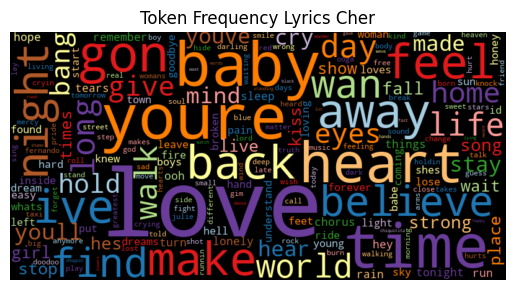

In [81]:
wordcloud(count_lyrics_cher['freq'], title='Token Frequency Lyrics Cher', stopwords=stopwords_list)

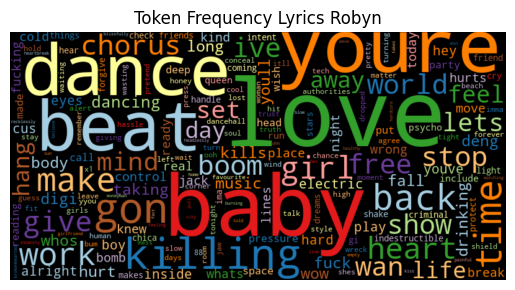

In [82]:
wordcloud(count_lyrics_robyn['freq'], title='Token Frequency Lyrics Robyn', stopwords=stopwords_list)

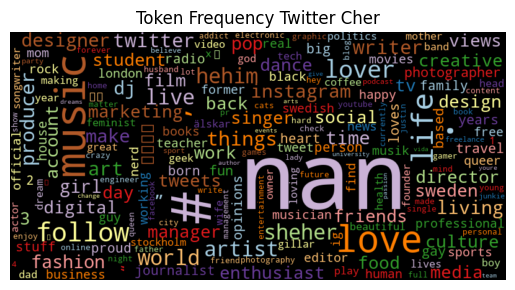

In [83]:
wordcloud(count_twitter_cher['freq'], title='Token Frequency Twitter Cher', stopwords=stopwords_list)

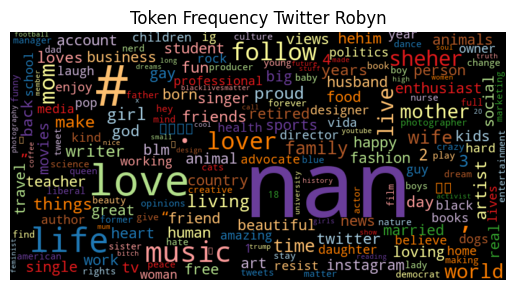

In [84]:
wordcloud(count_twitter_robyn['freq'], title='Token Frequency Twitter Robyn', stopwords=stopwords_list)

Q: What observations do you have about these (relatively straightforward) wordclouds? 

A: So for the twitter posts we need to do more cleaning around the null values and the # as these are prevalent in the wordcloud when they shouldn't be. Also we can see some special charachters as well. For the lyrics it is more of a word cloud that we should see which words popping out that have meaning and can help us understand more about the artist, we can also see that each artist uses alot of the same words in all of there songs or most of there songs because they are bigger in the word cloud.